In [1]:
from rostok.graph_grammar.node import BlockWrapper, ROOT
from rostok.graph_grammar import node_vocabulary, rule_vocabulary
from rostok.block_builder.node_render import *


import pychrono as chrono

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np




def plot_graph(graph):
    plt.figure()
    nx.draw_networkx(graph, pos=nx.kamada_kawai_layout(graph, dim=2), node_size=800,
                    labels={n: graph.nodes[n]["Node"].label for n in G})
    #plt.figure()
    #nx.draw_networkx(graph, pos=nx.kamada_kawai_layout(G, dim=2), node_size=800)
    plt.show()
    
 

def init_extension_rules():
    # %% Bodies for extansions rules
    width = [0.25, 0.35, 1.5]
    alpha = 45
    alpha_left = [0, 30, 60]
    alpha_right = [180, 150, 120]
    length_link = [0.4, 0.6, 0.8]

    flat = list(map(lambda x: BlockWrapper(FlatChronoBody, width=x, length=0.25, depth=2),
                    width))

    link = list(map(lambda x: BlockWrapper(LinkChronoBody, length=x),
                    length_link))


    u1 = BlockWrapper(MountChronoBody, width=0.1, length=0.05)
    u2 = BlockWrapper(MountChronoBody, width=0.2, length=0.1)

    # %% Tranform for extansions rules 
    # z_shift = [-0.3, 0, 0.3]
    # MOVE_TO_RIGHT_SIDE = []
    # for i in width:
    #     for j in z_shift:
    #         for alpha in alpha_right:
    #             quat_Y_ang_alpha = chrono.Q_from_AngY(np.deg2rad(alpha))
    #             ROTATE_TO_ALPHA = FrameTransform([i, 0, j],[quat_Y_ang_alpha.e0,quat_Y_ang_alpha.e1,
    #                                         quat_Y_ang_alpha.e2,quat_Y_ang_alpha.e3])
    #             MOVE_TO_RIGHT_SIDE.append(ROTATE_TO_ALPHA)
    
    # transform_to_right_mount_list = list(map(lambda x: BlockWrapper(ChronoTransform, x), MOVE_TO_RIGHT_SIDE))
                
    def rotation(alpha):
        quat_Y_ang_alpha = chrono.Q_from_AngY(np.deg2rad(alpha))
        return [quat_Y_ang_alpha.e0, quat_Y_ang_alpha.e1, quat_Y_ang_alpha.e2,quat_Y_ang_alpha.e3]


    MOVE_TO_RIGHT_SIDE = map(lambda x: FrameTransform([x*0.4, 0, 0],[0,0,1,0]),
                    width)
    MOVE_TO_RIGHT_SIDE_PLUS = map(lambda x: FrameTransform([x*0.4, 0, +0.8],[0,0,1,0]),
                    width)
    MOVE_TO_RIGHT_SIDE_PLUS_ANGLE = map(lambda x: FrameTransform([x*0.4, 0, +0.8], rotation(150)),
                    width)
    MOVE_TO_RIGHT_SIDE_MINUS = map(lambda x: FrameTransform([x*0.4, 0, -0.8],[0,0,1,0]),
                    width)
    MOVE_TO_RIGHT_SIDE_MINUS_ANGLE = map(lambda x: FrameTransform([x*0.4, 0, -0.8],rotation(210)),
                    width)
    MOVE_TO_LEFT_SIDE = map(lambda x:  FrameTransform([-x*0.4, 0, 0],[1,0,0,0]),
                    width)
    MOVE_TO_LEFT_SIDE_PLUS = map(lambda x: FrameTransform([-x*0.4, 0, +0.8],[1,0,0,0]),
                    width)
    MOVE_TO_LEFT_SIDE_PLUS_ANGLE = map(lambda x: FrameTransform([-x*0.4, 0, +0.8],rotation(30)),
                    width)
    MOVE_TO_LEFT_SIDE_MINUS = map(lambda x: FrameTransform([-x*0.4, 0, -0.8],[1,0,0,0]),
                    width)
    MOVE_TO_LEFT_SIDE_MINUS_ANGLE = map(lambda x: FrameTransform([-x*0.4, 0, -0.8],rotation(-30)),
                    width)

    # quat_Y_ang_alpha = chrono.Q_from_AngY(np.deg2rad(alpha))
    # ROTATE_TO_ALPHA = FrameTransform([0, 0, 0],[quat_Y_ang_alpha.e0,quat_Y_ang_alpha.e1,
    #                                         quat_Y_ang_alpha.e2,quat_Y_ang_alpha.e3])


    transform_to_right_mount = list(map(lambda x: BlockWrapper(ChronoTransform, x),
                    MOVE_TO_RIGHT_SIDE))
    transform_to_right_mount_plus = list(map(lambda x: BlockWrapper(ChronoTransform, x),
                    MOVE_TO_RIGHT_SIDE_PLUS))
    transform_to_right_mount_plus_angle = list(map(lambda x: BlockWrapper(ChronoTransform, x),
                    MOVE_TO_RIGHT_SIDE_PLUS_ANGLE))
    transform_to_right_mount_minus = list(map(lambda x: BlockWrapper(ChronoTransform, x),
                    MOVE_TO_RIGHT_SIDE_MINUS))
    transform_to_right_mount_minus_angle = list(map(lambda x: BlockWrapper(ChronoTransform, x),
                    MOVE_TO_RIGHT_SIDE_MINUS_ANGLE))
    transform_to_left_mount = list(map(lambda x: BlockWrapper(ChronoTransform, x),
                    MOVE_TO_LEFT_SIDE))
    transform_to_left_mount_plus = list(map(lambda x: BlockWrapper(ChronoTransform, x),
                    MOVE_TO_LEFT_SIDE_PLUS))
    transform_to_left_mount_plus_angle = list(map(lambda x: BlockWrapper(ChronoTransform, x),
                    MOVE_TO_LEFT_SIDE_PLUS_ANGLE))
    transform_to_left_mount_minus = list(map(lambda x: BlockWrapper(ChronoTransform, x),
                    MOVE_TO_LEFT_SIDE_MINUS))
    transform_to_left_mount_minus_angle = list(map(lambda x: BlockWrapper(ChronoTransform, x),
                    MOVE_TO_LEFT_SIDE_MINUS_ANGLE))
    # transform_to_alpha_rotate = BlockWrapper(ChronoTransform, ROTATE_TO_ALPHA)


    # %%
    type_of_input = ChronoRevolveJoint.InputType.TORQUE

    # Joints
    revolve1 = BlockWrapper(ChronoRevolveJoint, ChronoRevolveJoint.Axis.Z,  type_of_input)

    # Nodes
    node_vocab = node_vocabulary.NodeVocabulary()
    node_vocab.add_node(ROOT)
    node_vocab.create_node("J")
    node_vocab.create_node("L")
    node_vocab.create_node("F")
    node_vocab.create_node("M")
    node_vocab.create_node("EF")
    node_vocab.create_node("EM")
    node_vocab.create_node("SML")
    node_vocab.create_node("SMR")
    node_vocab.create_node("SMRP")
    node_vocab.create_node("SMRPA")
    node_vocab.create_node("SMLP")
    node_vocab.create_node("SMLPA")
    node_vocab.create_node("SMRM")
    node_vocab.create_node("SMRMA")
    node_vocab.create_node("SMLM")
    node_vocab.create_node("SMLMA")


    #O = Node("O")
    node_vocab.create_node(label="J1", is_terminal=True, block_wrapper=revolve1)
    node_vocab.create_node(label="L1", is_terminal=True, block_wrapper=link[0])
    node_vocab.create_node(label="L2", is_terminal=True, block_wrapper=link[1])
    node_vocab.create_node(label="L3", is_terminal=True, block_wrapper=link[2])
    node_vocab.create_node(label="F1", is_terminal=True, block_wrapper=flat[0])
    node_vocab.create_node(label="F2", is_terminal=True, block_wrapper=flat[1])
    node_vocab.create_node(label="F3", is_terminal=True, block_wrapper=flat[2])
    node_vocab.create_node(label="U1", is_terminal=True, block_wrapper=u1)
    node_vocab.create_node(label="U2", is_terminal=True, block_wrapper=u2)

    node_vocab.create_node(label="TR1", is_terminal=True, block_wrapper=transform_to_right_mount[0])
    node_vocab.create_node(label="TR2", is_terminal=True, block_wrapper=transform_to_right_mount[1])
    node_vocab.create_node(label="TR3", is_terminal=True, block_wrapper=transform_to_right_mount[2])
    node_vocab.create_node(label="TRP1", is_terminal=True, block_wrapper=transform_to_right_mount_plus[0])
    node_vocab.create_node(label="TRP2", is_terminal=True, block_wrapper=transform_to_right_mount_plus[1])
    node_vocab.create_node(label="TRP3", is_terminal=True, block_wrapper=transform_to_right_mount_plus[2])
    node_vocab.create_node(label="TRPA1", is_terminal=True, block_wrapper=transform_to_right_mount_plus_angle[0])
    node_vocab.create_node(label="TRPA2", is_terminal=True, block_wrapper=transform_to_right_mount_plus_angle[1])
    node_vocab.create_node(label="TRPA3", is_terminal=True, block_wrapper=transform_to_right_mount_plus_angle[2])
    node_vocab.create_node(label="TRM1", is_terminal=True, block_wrapper=transform_to_right_mount_minus[0])
    node_vocab.create_node(label="TRM2", is_terminal=True, block_wrapper=transform_to_right_mount_minus[1])
    node_vocab.create_node(label="TRM3", is_terminal=True, block_wrapper=transform_to_right_mount_minus[2])
    node_vocab.create_node(label="TRMA1", is_terminal=True, block_wrapper=transform_to_right_mount_minus_angle[0])
    node_vocab.create_node(label="TRMA2", is_terminal=True, block_wrapper=transform_to_right_mount_minus_angle[1])
    node_vocab.create_node(label="TRMA3", is_terminal=True, block_wrapper=transform_to_right_mount_minus_angle[2])

    node_vocab.create_node(label="TL1", is_terminal=True, block_wrapper=transform_to_left_mount[0])
    node_vocab.create_node(label="TL2", is_terminal=True, block_wrapper=transform_to_left_mount[1])
    node_vocab.create_node(label="TL3", is_terminal=True, block_wrapper=transform_to_left_mount[2])
    node_vocab.create_node(label="TLP1", is_terminal=True, block_wrapper=transform_to_left_mount_plus[0])
    node_vocab.create_node(label="TLP2", is_terminal=True, block_wrapper=transform_to_left_mount_plus[1])
    node_vocab.create_node(label="TLP3", is_terminal=True, block_wrapper=transform_to_left_mount_plus[2])
    node_vocab.create_node(label="TLPA1", is_terminal=True, block_wrapper=transform_to_left_mount_plus_angle[0])
    node_vocab.create_node(label="TLPA2", is_terminal=True, block_wrapper=transform_to_left_mount_plus_angle[1])
    node_vocab.create_node(label="TLPA3", is_terminal=True, block_wrapper=transform_to_left_mount_plus_angle[2])
    node_vocab.create_node(label="TLM1", is_terminal=True, block_wrapper=transform_to_left_mount_minus[0])
    node_vocab.create_node(label="TLM2", is_terminal=True, block_wrapper=transform_to_left_mount_minus[1])
    node_vocab.create_node(label="TLM3", is_terminal=True, block_wrapper=transform_to_left_mount_minus[2])
    node_vocab.create_node(label="TLMA1", is_terminal=True, block_wrapper=transform_to_left_mount_minus_angle[0])
    node_vocab.create_node(label="TLMA2", is_terminal=True, block_wrapper=transform_to_left_mount_minus_angle[1])
    node_vocab.create_node(label="TLMA3", is_terminal=True, block_wrapper=transform_to_left_mount_minus_angle[2])

    # Defines rules
    rule_vocab = rule_vocabulary.RuleVocabulary(node_vocab)

    rule_vocab.create_rule("InitMechanism_2", ["ROOT"], ["F", "SML", "SMR","EM","EM"], 0 , 0,[(0,1),(0,2),(1,3),(2,4)])
    rule_vocab.create_rule("InitMechanism_3_R", ["ROOT"], ["F", "SML", "SMRP","SMRM","EM","EM","EM"], 0 , 0,[(0,1),(0,2),(0,3),(1,4),(2,5),(3,6)])
    rule_vocab.create_rule("InitMechanism_3_R_A", ["ROOT"], ["F", "SML", "SMRPA","SMRMA","EM","EM","EM"], 0 , 0,[(0,1),(0,2),(0,3),(1,4),(2,5),(3,6)])
    rule_vocab.create_rule("InitMechanism_3_L", ["ROOT"], ["F", "SMLP","SMLM", "SMR","EM","EM","EM"], 0 , 0, [(0,1),(0,2),(0,3),(1,4),(2,5),(3,6)])
    rule_vocab.create_rule("InitMechanism_3_L_A", ["ROOT"], ["F", "SMLPA","SMLMA", "SMR","EM","EM","EM"], 0 , 0, [(0,1),(0,2),(0,3),(1,4),(2,5),(3,6)])
    rule_vocab.create_rule("InitMechanism_4", ["ROOT"], ["F", "SMLP","SMLM", "SMRP","SMRM","EM","EM","EM","EM"], 0 , 0, [(0,1),(0,2),(0,3),(0,4),(1,5),(2,6),(3,7),(4,8)])
    rule_vocab.create_rule("InitMechanism_4_A", ["ROOT"], ["F", "SMLPA","SMLMA", "SMRPA","SMRMA","EM","EM","EM","EM"], 0 , 0, [(0,1),(0,2),(0,3),(0,4),(1,5),(2,6),(3,7),(4,8)])
    rule_vocab.create_rule("InitMech_6", ["ROOT"], ["F", "SMLPA", "SMLMA", "SMRPA", "SMRMA", "SML", "SMR", "EM", "EM", "EM", "EM", "EM", "EM"], 0, 0, [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0,6), (1, 7), (2, 8), (3, 9), (4, 10), (5, 11), (6, 12)])
    rule_vocab.create_rule("FingerUpper", ["EM"], ["J", "L","EM"], 0, 2, [(0, 1), (1, 2)])
    # for rule in rule_vocab.rule_dict.items():
    #     rule_vocab.rule_vis(rule[0])

    rule_vocab.create_rule("TerminalFlat1", ["F"], ["F1"], 0 , 0)
    rule_vocab.create_rule("TerminalFlat2", ["F"], ["F2"], 0 , 0)
    rule_vocab.create_rule("TerminalFlat3", ["F"], ["F3"], 0 , 0)

    rule_vocab.create_rule("TerminalL1", ["L"], ["L1"], 0 , 0)
    rule_vocab.create_rule("TerminalL2", ["L"], ["L2"], 0 , 0)
    rule_vocab.create_rule("TerminalL3", ["L"], ["L3"], 0 , 0)

    rule_vocab.create_rule("TerminalTransformRight1", ["SMR"], ["TR1"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformRight2", ["SMR"], ["TR2"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformRight3", ["SMR"], ["TR3"], 0 , 0)

    rule_vocab.create_rule("TerminalTransformRightPlus1", ["SMRP"], ["TRP1"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformRightPlus2", ["SMRP"], ["TRP2"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformRightPlus3", ["SMRP"], ["TRP3"], 0 , 0)

    rule_vocab.create_rule("TerminalTransformRightPlusAngle1", ["SMRPA"], ["TRPA1"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformRightPlusAngle2", ["SMRPA"], ["TRPA2"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformRightPlusAngle3", ["SMRPA"], ["TRPA3"], 0 , 0)

    rule_vocab.create_rule("TerminalTransformRightMinus1", ["SMRM"], ["TRM1"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformRightMinus2", ["SMRM"], ["TRM2"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformRightMinus3", ["SMRM"], ["TRM3"], 0 , 0)

    rule_vocab.create_rule("TerminalTransformRightMinusAngle1", ["SMRMA"], ["TRMA1"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformRightMinusAngle2", ["SMRMA"], ["TRMA2"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformRightMinusAngle3", ["SMRMA"], ["TRMA3"], 0 , 0)

    rule_vocab.create_rule("TerminalTransformLeft1", ["SML"], ["TL1"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformLeft2", ["SML"], ["TL2"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformLeft3", ["SML"], ["TL3"], 0 , 0)

    rule_vocab.create_rule("TerminalTransformLeftPlus1", ["SMLP"], ["TLP1"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformLeftPlus2", ["SMLP"], ["TLP2"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformLeftPlus3", ["SMLP"], ["TLP3"], 0 , 0)

    rule_vocab.create_rule("TerminalTransformLeftPlusAngle1", ["SMLPA"], ["TLPA1"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformLeftPlusAngle2", ["SMLPA"], ["TLPA2"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformLeftPlusAngle3", ["SMLPA"], ["TLPA3"], 0 , 0)

    rule_vocab.create_rule("TerminalTransformLeftMinus1", ["SMLM"], ["TLM1"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformLeftMinus2", ["SMLM"], ["TLM2"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformLeftMinus3", ["SMLM"], ["TLM3"], 0 , 0)

    rule_vocab.create_rule("TerminalTransformLeftMinusAngle1", ["SMLMA"], ["TLMA1"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformLeftMinusAngle2", ["SMLMA"], ["TLMA2"], 0 , 0)
    rule_vocab.create_rule("TerminalTransformLeftMinusAngle3", ["SMLMA"], ["TLMA3"], 0 , 0)

    rule_vocab.create_rule("TerminalEndLimb1", ["EM"], ["U1"], 0 , 0)
    rule_vocab.create_rule("TerminalEndLimb2", ["EM"], ["U2"], 0 , 0)
    rule_vocab.create_rule("TerminalJoint", ["J"], ["J1"], 0 , 0)


    list_J = node_vocab.get_list_of_nodes(["J1"])
    list_RM = node_vocab.get_list_of_nodes(["TR1", "TR2", "TR3","TRP1", "TRP2", "TRP3","TRM1", "TRM2", "TRM3", "TRPA1", "TRPA2", "TRPA3","TRMA1", "TRMA2", "TRMA3"])
    list_LM = node_vocab.get_list_of_nodes(["TL1", "TL2", "TL3","TLP1", "TLP2", "TLP3","TLM1", "TLM2", "TLM3", "TLPA1", "TLPA2", "TLPA3","TLMA1", "TLMA2", "TLMA3"] )
    list_B = node_vocab.get_list_of_nodes(["L1", "L2", "L3", "F1", "F2", "F3", "U1", "U2"])
    # Required for criteria calc
    node_features = [list_B, list_J, list_LM, list_RM]
    return rule_vocab, node_features

rule_vocabul, node_features = init_extension_rules()

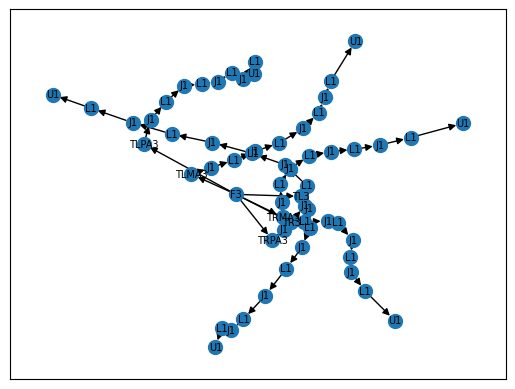

In [2]:
from rostok.graph_grammar.node import GraphGrammar
from rostok.graph_grammar.graph_utils import plot_graph


rules = ["InitMech_6", "TerminalFlat3", "TerminalTransformLeftMinusAngle3", "TerminalTransformLeftPlusAngle3", "TerminalTransformRightMinusAngle3", "TerminalTransformRightPlusAngle3", "TerminalTransformRight3", "TerminalTransformLeft3"] + ["FingerUpper"]*24 + ["TerminalJoint"]*24 + ["TerminalEndLimb1"]*6 + ["TerminalL1"]*24

def get_terminal_graph_three_different_finger():
    G = GraphGrammar()
    for i in list(rules):
        G.apply_rule(rule_vocabul.get_rule(i))
    return G

plot_graph(get_terminal_graph_three_different_finger())

In [3]:
import random

import numpy as np
import pychrono as chrono

import rostok.virtual_experiment.simulation_step as step
from rostok.block_builder.basic_node_block import SimpleBody
from rostok.block_builder.node_render import (ChronoBodyEnv,
                                              DefaultChronoMaterial,
                                              FrameTransform)
from rostok.criterion.flags_simualtions import FlagMaxTime
from rostok.graph_grammar.node import BlockWrapper
from rostok.trajectory_optimizer.control_optimizer import num_joints
from rostok.trajectory_optimizer.trajectory_generator import create_torque_traj_from_x

# Constants
MAX_TIME = 3
TIME_STEP = 1e-3

graph = get_terminal_graph_three_different_finger()

# Create trajectory 
number_trq = num_joints(graph)
const_torque_koef = [random.random() for _ in range(number_trq)]
arr_trj = create_torque_traj_from_x(graph, const_torque_koef, MAX_TIME, TIME_STEP)

# Create object to grasp
mat = DefaultChronoMaterial()
mat.Friction = 0.65
mat.DampingF = 0.65
obj = BlockWrapper(ChronoBodyEnv,
                    shape=SimpleBody.BOX,
                    material=mat,
                    pos=FrameTransform([0, 1000, 0], [0, -0.048, 0.706, 0.706]))

# Configurate simulation
config_sys = {"Set_G_acc": chrono.ChVectorD(0, 0, 0)}
flags = [FlagMaxTime(MAX_TIME)]

sim = step.SimulationStepOptimization(arr_trj, graph, obj)
sim.set_flags_stop_simulation(flags)
sim.change_config_system(config_sys)

# Start simulation
sim_output = sim.simulate_system(TIME_STEP, True)